# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="./Tennis_Linux_NoVis/Tennis.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(
    states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
# for i in range(1, 6):                                      # play game for 5 episodes
#     env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
#     states = env_info.vector_observations                  # get the current state (for each agent)
#     scores = np.zeros(num_agents)                          # initialize the score (for each agent)
#     while True:
#         actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#         actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#         env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#         next_states = env_info.vector_observations         # get next state (for each agent)
#         rewards = env_info.rewards                         # get reward (for each agent)
#         dones = env_info.local_done                        # see if episode finished
#         scores += env_info.rewards                         # update the score (for each agent)
#         states = next_states                               # roll over states to next time step
#         if np.any(dones):                                  # exit loop if episode finished
#             break
#     print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

# Exercise

## Train an agent

In [7]:
from collections import deque
from ddpg_agent import Agent
import torch

In [8]:
def ddpg(n_episodes=2000, max_t=1000, is_train=True, threshold=0.5, seed=0):
    # load the enviornment
    env_info = env.reset(train_mode=is_train)[brain_name]

    # information of the environment
    num_agents = len(env_info.agents)
    action_size = env.brains[brain_name].vector_action_space_size
    state_size = len(env_info.vector_observations[0])

    # set an agent
    agent = Agent(state_size, action_size, random_seed=seed)

    # score list for plot
    score_list = []
    # the recent 100 scores for calculate the average score
    average_denominator = 100
    recent_scores = deque(maxlen=average_denominator)

    num_update = 10

    for i_episode in range(1, n_episodes + 1):
        # reset environment information
        env_info = env.reset(train_mode=is_train)[brain_name]
        # reset the current state
        states = env_info.vector_observations
        # reset the agent
        agent.reset()
        # reset socres
        scores = np.zeros(num_agents)

        # roll over
        for t in range(max_t):
            # update actions
            actions = agent.act(states)
            # update env
            updated_env_info = env.step(actions)[brain_name]
            # update next_states
            next_states = updated_env_info.vector_observations
            # update rewards
            rewards = updated_env_info.rewards
            # check the episode is fininshed for each agent
            dones = updated_env_info.local_done  # see if episode finished
            agent.increase_replay(states, actions, rewards, next_states, dones)

            if t % num_update == 0:
                agent.step(states, actions, rewards, next_states, dones)
            # update currunts state as nest_states
            states = next_states
            # update scores
            scores += rewards
            if np.any(dones):
                break

        # calculate mean_score of agents append to score_list
        score_list.append(np.max(scores))
        # calculate mean_score of recent 100 episodes to score_list
        recent_scores.append(np.max(scores))
        average_score = np.average(recent_scores)

        # print
        print(
            '\r> i_episode: {:4d}\taverage_score: {:.3f}'.format(
                i_episode, average_score),
            end="")
        if i_episode % 100 == 0:
            print(
                '\r> i_episode: {:4d}\taverage_score: {:.3f}'.format(
                    i_episode, average_score),
                end="\n")

        if average_score > threshold:
            print("\n= completed in i_episode: {:4d}\taverage_score: {:.3f}".
                  format(i_episode, average_score))

            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(),
                       'checkpoint_critic.pth')
            break

    return score_list

In [9]:
scores = ddpg()

/root/anaconda3/envs/drlnd/lib/python3.6/site-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


> i_episode:  100	average_score: 0.001
> i_episode:  200	average_score: 0.000
> i_episode:  300	average_score: 0.000
> i_episode:  400	average_score: 0.000
> i_episode:  500	average_score: 0.030
> i_episode:  600	average_score: 0.000
> i_episode:  700	average_score: 0.096
> i_episode:  800	average_score: 0.138
> i_episode:  859	average_score: 0.511
= completed in i_episode:  859	average_score: 0.511


In [10]:
env.close()

## Plot the result

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

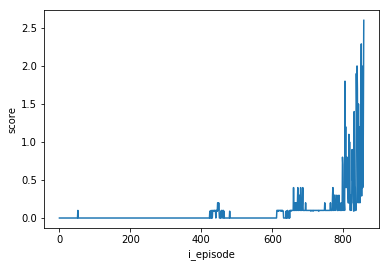

In [12]:
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('score')
plt.xlabel('i_episode')
plt.show()